Lane Line detection is a critical component for self driving cars and also for computer vision in general. The project is to program self-driving cars and to avoid the risk of getting in another lane.

we will build a machine learning project to detect lane lines in real-time. We will do this using the concepts of computer vision using OpenCV library. To detect the lane we have to detect the white markings on both sides on the lane.

Using computer vision techniques in Python, we will identify road lane lines in which autonomous cars must run. This will be a critical part of autonomous cars, as the self-driving cars should not cross it’s lane and should not go in opposite lane to avoid accidents.

After making we need to detect lane lines. The technique used to detect mathematical shapes like this is called Hough Transform. Hough transformation can detect shapes like rectangles, circles, triangles, and lines.

![picture](https://drive.google.com/file/d/1bKyuxx1YkPjf-7eRNVNQEdljdL9tz2d8/view?usp=sharing)

# Frame Mask

frame mask is nothing but a NumPy array. When we want to apply a mask to an image, we simply change the pixel values of the desired region in that image to 0, or 255, or any other number. Given below is an example of image masking. The pixel values of a certain region in the image have been set to 0:

It is a pretty simple but effective method of removing unwanted regions and objects from the images.

# Image Pre-Processing for Lane Detection

We will first apply a mask to all the frames in our input video. Then, we will apply image thresholding followed by Hough Line Transformation to detect lane markings.

# Image Thresholding
In this method, the pixel values of a grayscale image are assigned one of the two values representing black and white colors based on a threshold value. So, if the value of a pixel is greater than a threshold value, it is assigned one value, else it is assigned the other value.

![picture](https://drive.google.com/file/d/1AhHFPAA4X8wJhkK3QVFXlBw75mV-uhCS/view?usp=sharing)


# Hough Line Transformation

The Hough transform is a feature extraction technique used in image analysis, computer vision, and digital image processing. The purpose of the technique is to find imperfect instances of objects within a certain class of shapes by a voting procedure. This voting procedure is carried out in a parameter space, from which object candidates are obtained as local maxima in a so-called accumulator space that is explicitly constructed by the algorithm for computing the Hough transform. 

Source- Wikipedia

# Implementing Lane Detection using OpenCV in Python

It’s time to implement this lane detection project in Python! I recommend using Google Colab because of the computation power that will be required for building our lane detection system.

Let's import the Required Libraries

In [25]:
import os
import re
import cv2
import numpy as np
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt  

Reading Video Frames

In [35]:
vid_frames=os.listdir('/content/drive/My Drive/Colab Notebooks/Lane Line detection/frames/content/drive/My Drive/Misc/road_detection/frames')
vid_frames.sort(key=lambda f:int(re.sub('\D','',f)))


col_images=[]
for i in tqdm_notebook(vid_frames):
  img=cv2.imread('/content/drive/My Drive/Colab Notebooks/Lane Line detection/frames/content/drive/My Drive/Misc/road_detection/frames/'+i)
  col_images.append(img)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


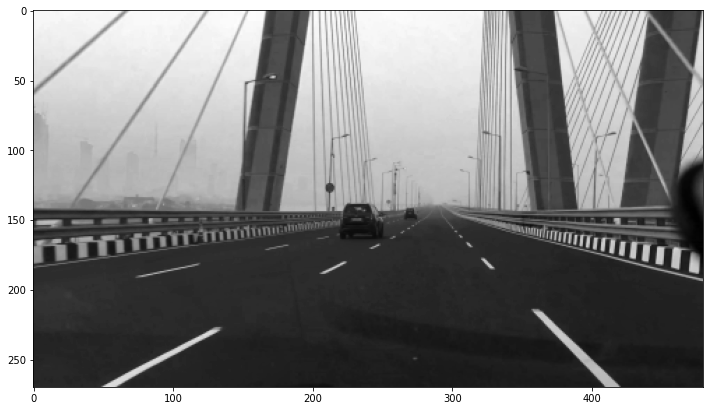

In [38]:
idx=400

#plot frame

plt.figure(figsize=(12,12))
plt.imshow(col_images[idx][:,:,0],cmap='gray')
plt.show()

In [37]:
tqdm_notebook(vid_frames)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  """Entry point for launching an IPython kernel.


  0%|<bar/>| 0/1108 [00:00<?, ?it/s]

Frame Mask Creation

The region of interest is in the shape of a polygon. We want to mask everything except this region. Therefore, we first have to specify the coordinates of the polygon and then use it to prepare the frame mask:

In [68]:
#creating zero array

zeros=np.zeros_like(col_images[idx][:,:,0])
print(zeros.shape)

polygon = np.array([[50,270], [220,160], [360,160], [480,270]])

cv2.fillConvexPoly(zeros,polygon,1)

(270, 480)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 1, 1, 1]], dtype=uint8)

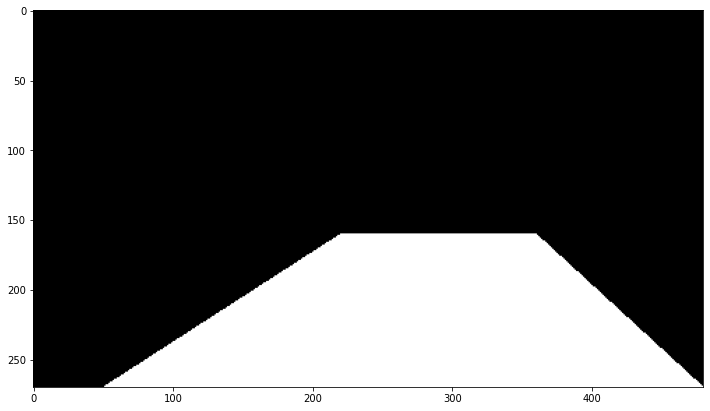

In [69]:
plt.figure(figsize=(12,12))
plt.imshow(zeros,cmap='gray')
plt.show()

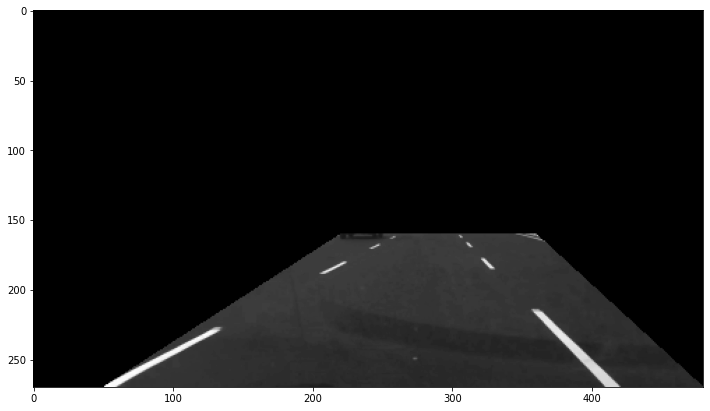

In [70]:
#applying polygon mask on frame


img=cv2.bitwise_and(col_images[idx][:,:,0],col_images[idx][:,:,0],mask=zeros)

plt.figure(figsize=(12,12))
plt.imshow(img,cmap='gray')
plt.show()

Image Preprocessing

We have to perform a couple of image pre-processing operations on the video frames to detect the desired lane. The pre-processing operations are:

1] Image Thresholding

2]Hough Line Transformation

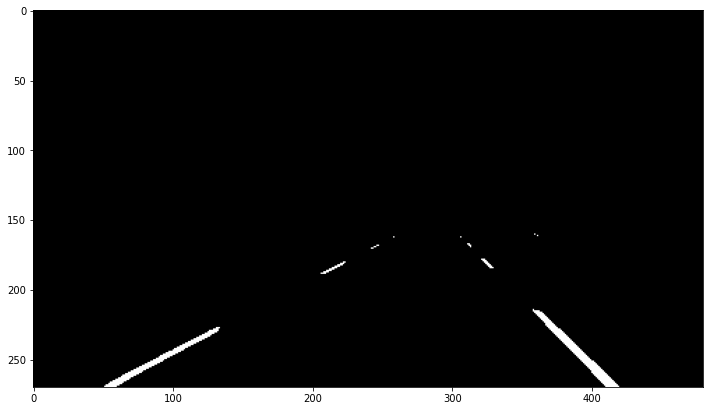

In [78]:
#image Thresholding

ret,thresh=cv2.threshold(img,127,255,cv2.THRESH_BINARY)

#plot image

plt.figure(figsize=(12,12))
plt.imshow(thresh,cmap='gray')
plt.show()

Hough Line Transformation

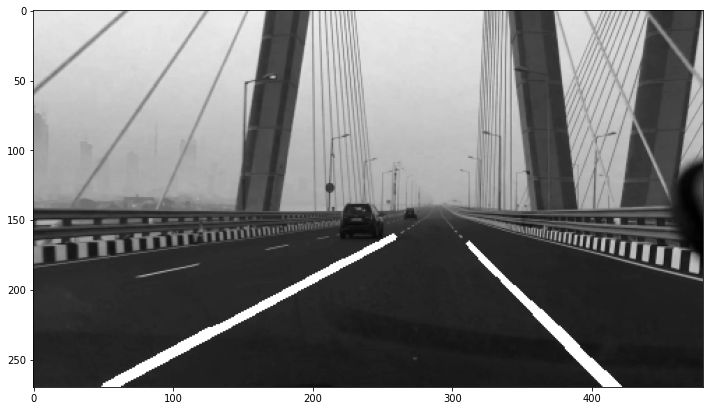

In [87]:
lines=cv2.HoughLinesP(thresh,1,np.pi/180,30,maxLineGap=100)

#copy of original frame

co_py=col_images[idx][:,:,0].copy()

#drawing hough lines

for line in lines:
  x1,y1,x2,y2=line[0]
  cv2.line(co_py,(x1,y1),(x2,y2),(255,0,0),3)

plt.figure(figsize=(12,12))
plt.imshow(co_py,cmap='gray')
plt.show()

Apply all these operations on all The Frames

In [103]:
cnt=0
for img in tqdm_notebook(col_images):

  #applying frame mask
  masked=cv2.bitwise_and(img[:,:,0],img[:,:,0],mask=zeros)

  #applying image thresholding
  ret,thresh=cv2.threshold(masked,130,145,cv2.THRESH_BINARY)

  #applying houh transformation
  lines=cv2.HoughLinesP(thresh,1,np.pi/180,30,maxLineGap=200)
  co_py=img.copy()

  #plot detected lines
  try:
    for line in lines:
      x1,y1,x2,y2=line[0]
      cv2.line(co_py,(x1,y1),(x2,y2),(255,0,0),3)

    cv2.imwrite(os.path.join('/content/drive/My Drive/Colab Notebooks/Lane Line detection/detected'+str(cnt)+'.png'),co_py)

  except TypeError:
    cv2.imwrite(os.path.join('/content/drive/My Drive/Colab Notebooks/Lane Line detection/detected'+str(cnt)+'.png'),img)

  cnt+=1


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


In [115]:
pathIn='/content/drive/My Drive/Colab Notebooks/Lane Line detection/'
pathout='/content/drive/My Drive/Colab Notebooks/Lane Line detection/road_detected.mp4'
fps=30

In [116]:
from os.path import isfile, join

files=[f for f in os.listdir(pathIn) if isfile(join(pathIn,f))]

files.sort(key=lambda f: int(re.sub('\D','',  f)))


In [117]:
frame_list=[]

for i in tqdm_notebook(range(len(files))):
  filename=pathIn+files[i]
  #reading each file
  img=cv2.imread(filename)
  height,width,layers=img.shape
  size=(width,height)

  #inserting the frames into image array
  frame_list.append(img)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


In [118]:
  #creating video

  out=cv2.VideoWriter(pathout,cv2.VideoWriter_fourcc(*'DIVX'),fps,size)

  for i in range(len(frame_list)):
    out.write(frame_list[i])

  out.release()